In [1]:
import random

def generate_data(n):
    data = []

    for _ in range(n):
        person = {
            "age": random.randint(18, 65),
            "income": random.randint(30000, 150000),
            "visits": random.randint(0, 20)
        }
        data.append(person)


    filtered = [p for p in data if p["visits"] > 3]


    if len(filtered) == 0:
        average_income = 0
    else:
        total_income = sum(p["income"] for p in filtered)
        average_income = total_income / len(filtered)

    return filtered, average_income



people, avg_income = generate_data(20)
print("Filtered people:", people)
print("Average income:", avg_income)


Filtered people: [{'age': 57, 'income': 70527, 'visits': 8}, {'age': 27, 'income': 114779, 'visits': 7}, {'age': 35, 'income': 84013, 'visits': 19}, {'age': 39, 'income': 120488, 'visits': 10}, {'age': 63, 'income': 112652, 'visits': 19}, {'age': 53, 'income': 87789, 'visits': 5}, {'age': 26, 'income': 82184, 'visits': 18}, {'age': 65, 'income': 66981, 'visits': 6}, {'age': 51, 'income': 102413, 'visits': 10}, {'age': 47, 'income': 62478, 'visits': 17}, {'age': 60, 'income': 97126, 'visits': 12}, {'age': 32, 'income': 127764, 'visits': 5}, {'age': 19, 'income': 54465, 'visits': 15}, {'age': 37, 'income': 141551, 'visits': 12}, {'age': 63, 'income': 42679, 'visits': 6}, {'age': 20, 'income': 41051, 'visits': 5}, {'age': 19, 'income': 83896, 'visits': 19}]
Average income: 87813.88235294117


In [2]:
import numpy as np

np.random.seed(42)

n = 100

age = np.random.randint(18, 66, size=n)
income = np.random.randint(30000, 150001, size=n)
visits = np.random.randint(0, 16, size=n)


engagement = visits / age

interaction_score = engagement * (income / 100000)

print("Age sample:", age[:5])
print("Income sample:", income[:5])
print("Visits sample:", visits[:5])
print("Engagement sample:", engagement[:5])
print("Interaction score sample:", interaction_score[:5])


Age sample: [56 46 32 60 25]
Income sample: [ 97563  32695  78190  35258 117538]
Visits sample: [12  8  2  6  5]
Engagement sample: [0.21428571 0.17391304 0.0625     0.1        0.2       ]
Interaction score sample: [0.20906357 0.05686087 0.04886875 0.035258   0.235076  ]


In [3]:
import pandas as pd
import numpy as np


data = {
    "age": [22, 35, 28, 45, 31, 52, 26, 39, 48, 34, 29, 41],
    "income": [42000, 85000, 60000, 120000, 75000, 98000, 50000, 88000, 110000, 67000, np.nan, 91000],
    "visits": [3, 8, 2, 10, 5, 7, 1, 6, 9, 4, 3, 8],
    "city": ["Tehran", "Shiraz", "Tabriz", "Tehran", "Isfahan", "Mashhad",
             "Qom", "Tehran", "Shiraz", "Tabriz", "Isfahan", "Mashhad"]
}

df = pd.DataFrame(data)

median_income = df["income"].median()
df["income"] = df["income"].fillna(median_income)
df["income_per_visit"] = df["income"] / (df["visits"] + 1)


df["segment"] = pd.qcut(
    df["income_per_visit"],
    q=3,
    labels=["low", "medium", "high"]
)

print(df)


    age    income  visits     city  income_per_visit segment
0    22   42000.0       3   Tehran      10500.000000     low
1    35   85000.0       8   Shiraz       9444.444444     low
2    28   60000.0       2   Tabriz      20000.000000    high
3    45  120000.0      10   Tehran      10909.090909     low
4    31   75000.0       5  Isfahan      12500.000000  medium
5    52   98000.0       7  Mashhad      12250.000000  medium
6    26   50000.0       1      Qom      25000.000000    high
7    39   88000.0       6   Tehran      12571.428571  medium
8    48  110000.0       9   Shiraz      11000.000000  medium
9    34   67000.0       4   Tabriz      13400.000000    high
10   29   85000.0       3  Isfahan      21250.000000    high
11   41   91000.0       8  Mashhad      10111.111111     low


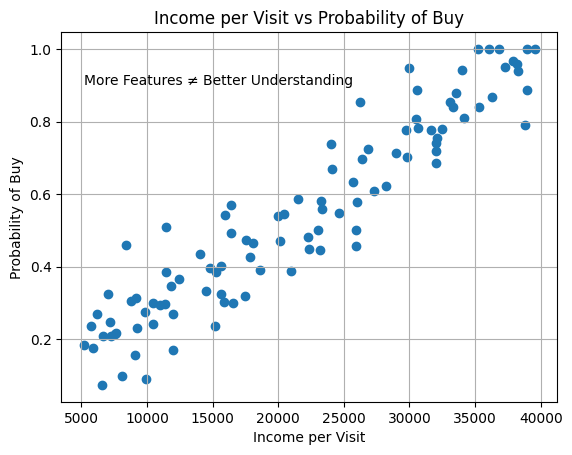

In [4]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

n = 100


income_per_visit = np.random.uniform(5000, 40000, n)

noise = np.random.normal(0, 0.1, n)
probability_of_buy = np.clip(
    (income_per_visit / income_per_visit.max()) + noise,
    0,
    1
)


plt.figure()
plt.scatter(income_per_visit, probability_of_buy)
plt.title("Income per Visit vs Probability of Buy")
plt.xlabel("Income per Visit")
plt.ylabel("Probability of Buy")
plt.grid(True)


plt.text(
    x=income_per_visit.min(),
    y=0.9,
    s="More Features ≠ Better Understanding"
)

plt.show()


In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

np.random.seed(42)

n = 500
age = np.random.randint(18, 66, n)
income = np.random.randint(30000, 150001, n)
visits = np.random.randint(0, 16, n)
income_per_visit = income / (visits + 1)
target = np.where((income > 80000) & (visits > 5), 1, 0)


df = pd.DataFrame({
    "age": age,
    "income": income,
    "visits": visits,
    "income_per_visit": income_per_visit,
    "target": target
})

X = df.drop("target", axis=1)
y = df["target"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

model.fit(X_train, y_train)


y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)


importances = pd.Series(
    model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

print("\nFeature Importances:")
print(importances)


Accuracy: 1.0

Feature Importances:
income              0.478691
visits              0.333122
income_per_visit    0.183153
age                 0.005034
dtype: float64
